In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os, copy
import cv2
import time
import OMRobjects as OMR
import imp
imp.reload(OMR)

%matplotlib inline

In [2]:
sheet_path = './data/You_to_me_me_to_you'
#sheet_path = './data/test_sheets'
sheets = [OMR.Sheet(os.path.join(sheet_path, page_path), order=i) for i, page_path in enumerate(sorted(os.listdir(sheet_path)))]

* Sheet Object Created :: Sheet #0 :: ./data/You_to_me_me_to_you/p1.png :: (1809, 1280)
* Sheet Object Created :: Sheet #1 :: ./data/You_to_me_me_to_you/p2.png :: (1809, 1280)
* Sheet Object Created :: Sheet #2 :: ./data/You_to_me_me_to_you/p3.png :: (1809, 1280)
* Sheet Object Created :: Sheet #3 :: ./data/You_to_me_me_to_you/p4.png :: (1809, 1280)


In [3]:
sample_idx = 0

In [4]:
sheets[sample_idx].preprocess_image(threshold=200)
sys_pos = sheets[sample_idx].create_system(sheets[sample_idx])

>>> Preprocessing Page #00 :: ./data/You_to_me_me_to_you/p1.png
* Deskewing :: PASS
* Resizing :: PASS
* Denoising :: PASS
* Inverse binary thresholding :: threshold=200
>>> Extracting systems : 5 systems
* System Object Created:: System #0 of [...you/p1.png] :: (x, y, w, h) = (83, 188, 1136, 230)
* System Object Created:: System #1 of [...you/p1.png] :: (x, y, w, h) = (79, 479, 1140, 220)
* System Object Created:: System #2 of [...you/p1.png] :: (x, y, w, h) = (80, 773, 1139, 238)
* System Object Created:: System #3 of [...you/p1.png] :: (x, y, w, h) = (83, 1070, 1136, 259)
* System Object Created:: System #4 of [...you/p1.png] :: (x, y, w, h) = (83, 1382, 1137, 247)


In [5]:
systems = sheets[sample_idx].systems
sample_idx = 0

RUNTIME : extract staff and bar lines 0.09 sec
RUNTIME : remove horizontal and vertical lines 0.71 sec


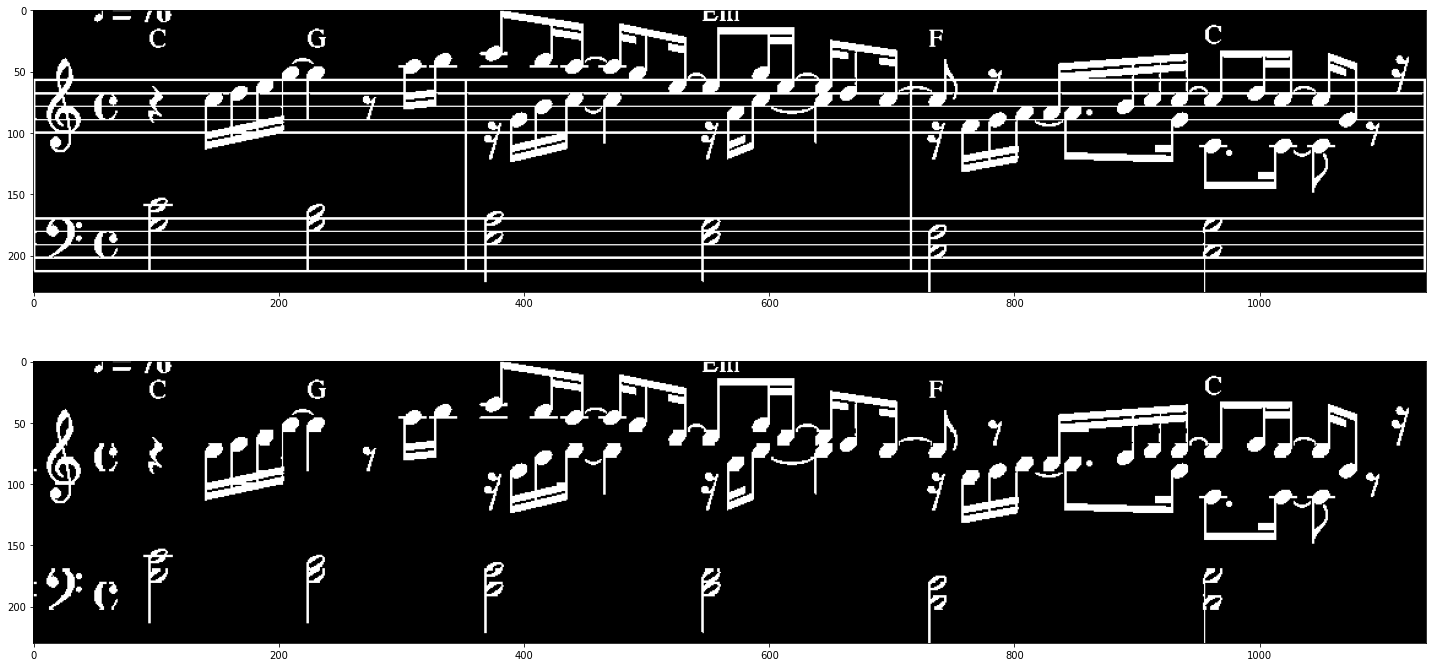

In [6]:
ts = time.time()

histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='row')
hline_pos, hthickness = systems[sample_idx].get_line_info(hist_by='row')

histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='col', grid=[0.3, 0.5, 0.7, 0.9, 0.95])
vline_pos, vthickness = systems[sample_idx].get_line_info(hist_by='col')
vline_pos, vthickness = systems[sample_idx].check_bar()

print(f'RUNTIME : extract staff and bar lines {time.time()-ts:.2f} sec')
ts = time.time()

systems[sample_idx].reset_line_removed_image()
systems[sample_idx].remove_lines(hline_pos, hthickness, direction='hor')
systems[sample_idx].remove_lines(vline_pos, vthickness, direction='ver')

print(f'RUNTIME : remove horizontal and vertical lines {time.time()-ts:.2f} sec')


fig = plt.figure(figsize=(20,10))
axt = plt.subplot2grid((2, 1), (0, 0))
axt.imshow(systems[sample_idx].image, cmap='gray')

axb = plt.subplot2grid((2, 1), (1, 0))
axb.imshow(systems[sample_idx].image_line_removed, cmap='gray')

fig.set_tight_layout(True)
plt.show()

test_image = systems[sample_idx].image_line_removed.copy()

(230, 1136, 3)


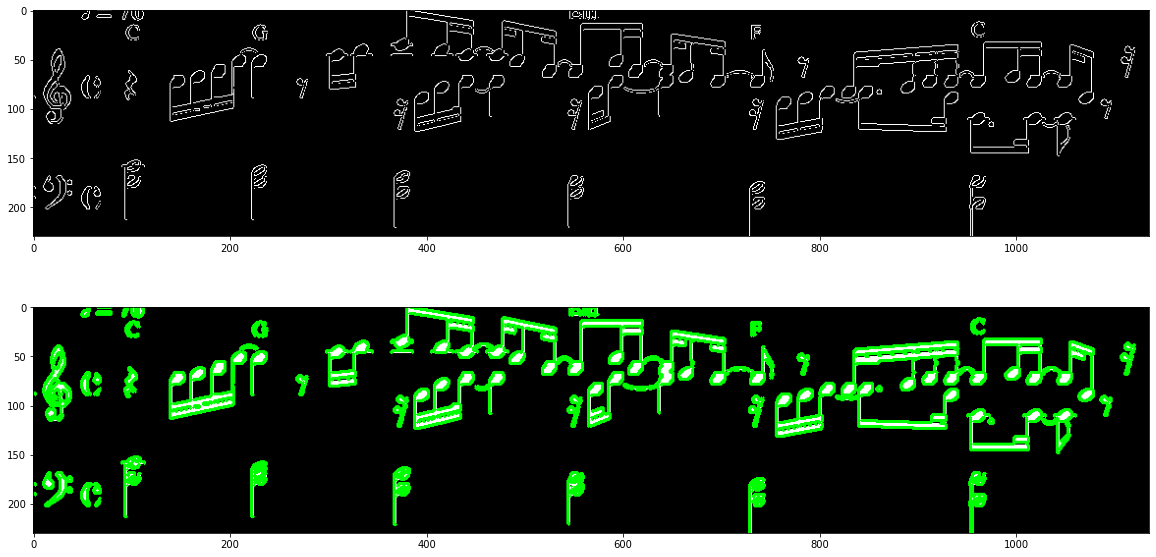

In [7]:
image = test_image.copy()
imageRGB = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
print(imageRGB.shape)

edges = cv2.Canny(image, 50, 150, apertureSize=3)
cnts = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(imageRGB, [c], 0, (0, 255, 0), 2)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(edges, cmap='gray')

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(imageRGB)

plt.show()

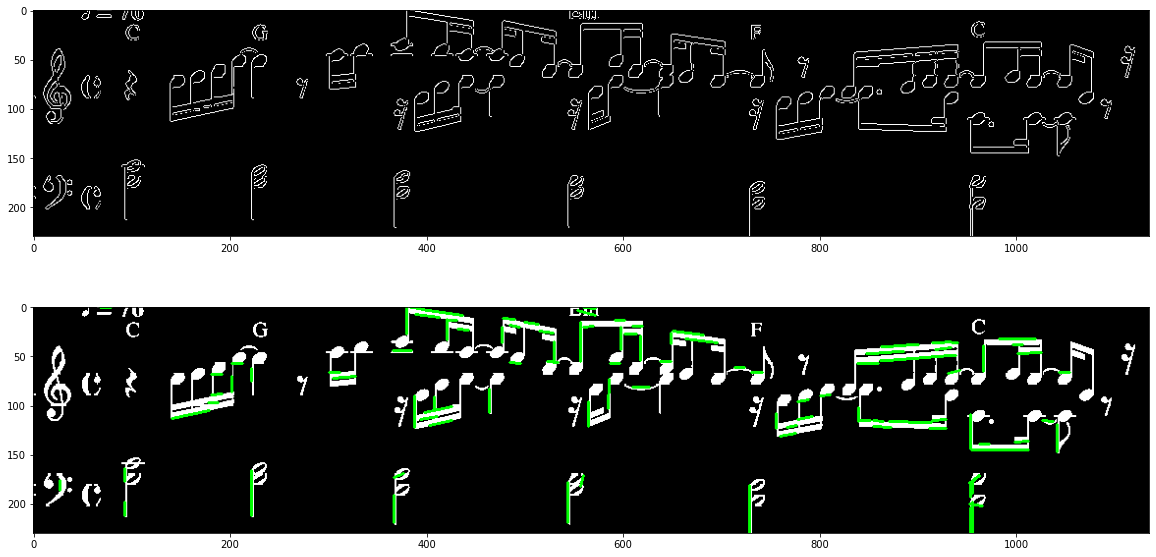

In [13]:
image = test_image.copy()
imageRGB = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

edges = cv2.Canny(image, 1, 10)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 5, None, 10, 2)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(imageRGB, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(edges, cmap='gray')

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(imageRGB)

plt.show()

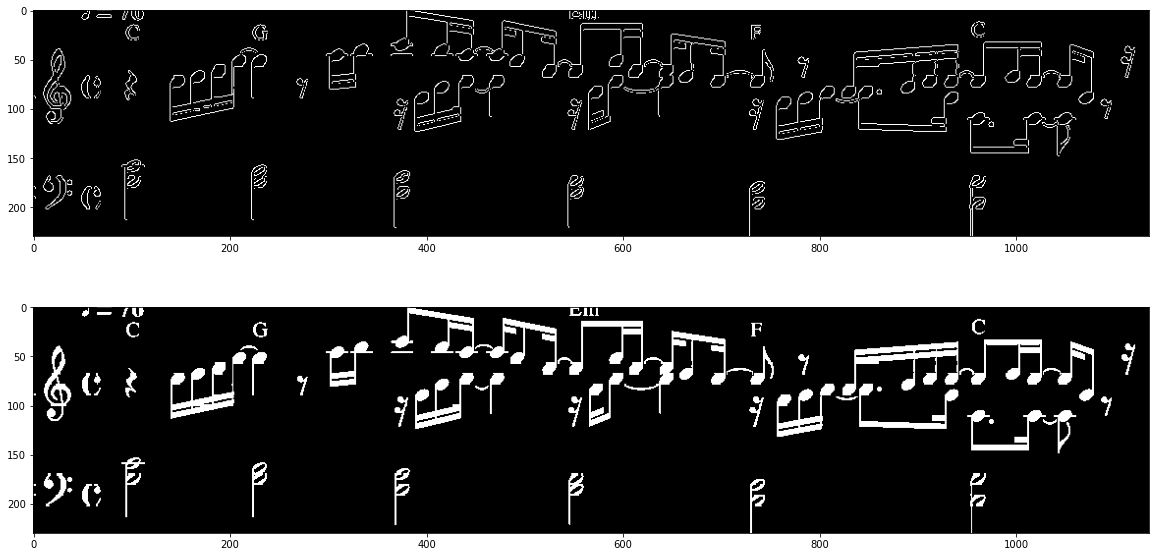

In [9]:
image = test_image.copy()
imageRGB = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

blur = cv2.GaussianBlur(image, (3,3), 0)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 2, None)
if circles is not None:
    circles = np.round(np.squeeze(circles))
    for i in circles[0, :100]:
        cv2.circle(imageRGB, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(imageRGB, (i[0], i[1]), 1, (0, 0, 255), 2)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(edges, cmap='gray')

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(imageRGB)

plt.show()